## MODEL 3: Multiple Linear Regression

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
data = fetch_california_housing()
data


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [19]:
df_target = pd.DataFrame(data.target, columns = ['target'])
df

In [20]:
df = pd.concat([df_features, df_target], axis = 1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [21]:
df_target=df['target'] = data.target # y
df_target.shape


(20640,)

In [14]:
df_features = pd.DataFrame(data.data, columns = data.feature_names) # X
df_features.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [15]:
df_target=df['target'] = data.target # y
df_target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [22]:
X = df[data.feature_names]
y = df['target']

In [23]:
 # Multiple Linear Regression 
model = LinearRegression() 
model.fit(X, y)  # X contains multiple features

LinearRegression()

In [24]:
print("Intercept", model.intercept_)


Intercept -36.941920207184424


In [26]:
for name, coef in zip(data.feature_names, model.coef_):
    print(f" {name} : {coef:.4f}")

 MedInc : 0.4367
 HouseAge : 0.0094
 AveRooms : -0.1073
 AveBedrms : 0.6451
 Population : -0.0000
 AveOccup : -0.0038
 Latitude : -0.4213
 Longitude : -0.4345


In [27]:
y_pred = model.predict(X)

In [28]:
mse = mean_squared_error(y,y_pred)
mse

0.5243209861846072

In [30]:

from sklearn.metrics import mean_squared_error, r2_score

In [31]:
r2 = r2_score(y, y_pred)
r2

0.606232685199805

## SECOND METHOD TRAIN TEST SPLIT

In [33]:

from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test =  train_test_split(X, y,test_size = 0.2, random_state = 42)

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)

In [37]:
mse = mean_squared_error(y_test, y_pred)
mse

0.555891598695244

In [38]:
r2 = r2_score(y_test, y_pred)
r2

0.5757877060324511

In [ ]:
plt.figure

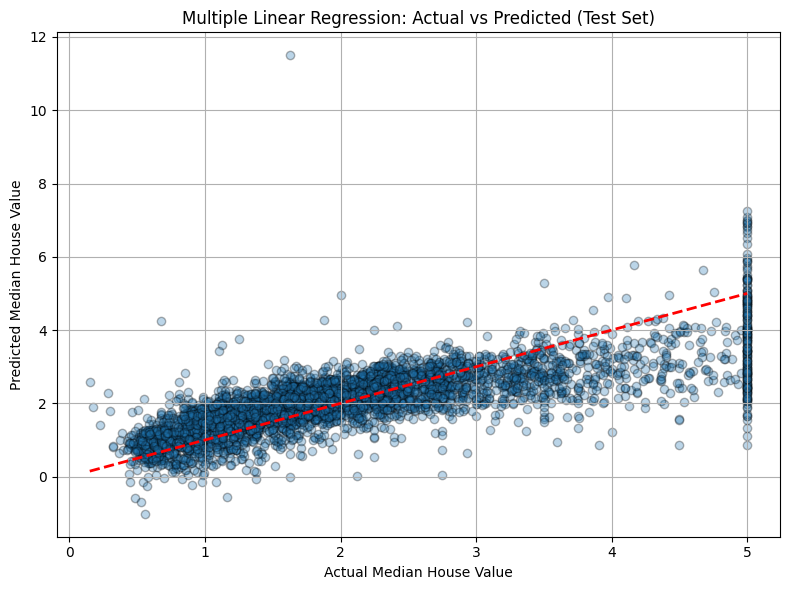

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Multiple Linear Regression: Actual vs Predicted (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()